# Programming Exercise 1: Linear Regression

### Linear regression with one variable

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [47]:
data=pd.read_csv('ex1data1.txt',names=['population','profit'])
data_x=np.c_[np.ones(data.shape[0]),data.population]
data_y=np.c_[data.profit]
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the Data

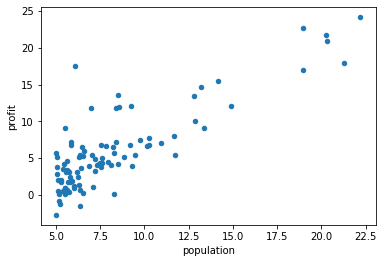

In [26]:
data.plot(x='population',y='profit',kind='scatter')

### Gradient Descent

In [41]:
def error(x,y,theta):
    return np.sum(np.square(x.dot(theta.T) - y)) / (2 * len(x))

In [159]:
def gradient_descent(x, y, theta, alpha, iterations):
    error_history = np.zeros(iterations)
    for i in range(iterations):
        theta -= (alpha / len(x)) * (x.T.dot(x.dot(theta.T) - y)).T
        J_history[i] = error(x, y, theta)
    
    return (theta.ravel(), error_history)


(0, 1500)

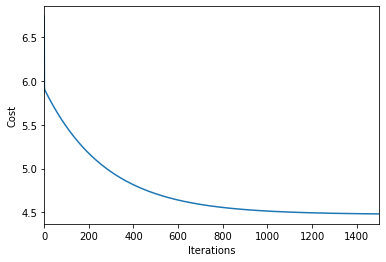

In [170]:
theta = np.zeros((1, 2))

iterations = 1500
alpha = 0.01 # Learning rate

theta, error_history = gradient_descent(data_x, data_y, theta, alpha, iterations)
plt.plot(error_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xlim(0, iterations)

### Linear Regression